# Perceptron

## (Artificial Neuron)
- A Perceptron is a single layer neural network
- It acts a Linear Classifier, Binary classification
- Loss Function : Binary Cross Entropy (-ve of Log Likelihood)
- Optimisation : Gradient Descent/ Stochastic Gradient Descent

### Learning Goals
- How to implement Perceptron?
- Understanding **Vectorization**
  writing efficient Code
  without using for loop!
- What is the meaning of \"Linear Classifier\"?

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

## Generating data

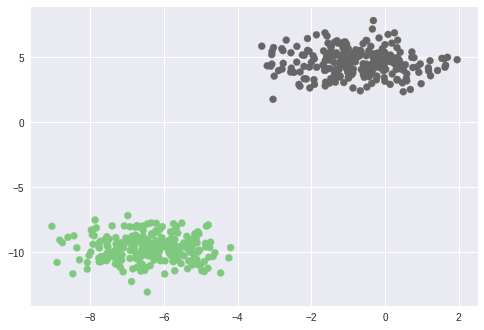

In [9]:
X,Y = make_blobs(n_samples=500, n_features=2, centers=2, random_state=11)

plt.style.use("seaborn")
plt.scatter(X[:,0], X[:,1], c=Y, cmap=plt.cm.Accent)
plt.show()

## Model & Helper Functions

In [10]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

## Perceptron Learning Algo
- Learn weight
- Reduce loss
- Make prediction

In [15]:
def predict(X,weights):
    """X -> m x (n+1)     weights -> (n+1) x 1"""
    z = np.dot(X, weights)
    predictions = sigmoid(z)
    return predictions

def loss(X,Y,weights):
    """Binary Cross Entropy"""
    Y_ = predict(X,weights)
    cost = np.mean(-Y*np.log(Y_) - (1-Y)*np.log(1-Y_))
    return cost

def update(X,Y,weights, learning_rate):
    """Perform weight update for 1 epoch"""
    Y_ = predict(X,weights)
    dw = np.dot(X.T, (Y_-Y))
    m = X.shape[0]
    weights = weights - learning_rate*dw/m
    return weights

def train(X,Y,learning_rate=0.5, max_epochs=100):
    
    # Modify input for bias
    ones = np.ones((X.shape[0],1))
    X = np.hstack((X, ones))
    
    # Init weights to 0
    weights = np.zeros(X.shape[1]) #(n+1) entries
    
    # Iterate over all epochs
    for epoch in range(max_epochs):
        weights = update(X,Y,weights,learning_rate)
        if(epoch%10==0):
            l = loss(X,Y,weights)
            print("Epochs %d Loss %f"%(epoch,l))
    return weights

In [21]:
weights = train(X,Y, max_epochs=500, learning_rate=0.8)

Epochs 0 Loss 0.000453
Epochs 10 Loss 0.000436
Epochs 20 Loss 0.000420
Epochs 30 Loss 0.000405
Epochs 40 Loss 0.000391
Epochs 50 Loss 0.000378
Epochs 60 Loss 0.000365
Epochs 70 Loss 0.000354
Epochs 80 Loss 0.000343
Epochs 90 Loss 0.000332
Epochs 100 Loss 0.000323
Epochs 110 Loss 0.000313
Epochs 120 Loss 0.000305
Epochs 130 Loss 0.000296
Epochs 140 Loss 0.000289
Epochs 150 Loss 0.000281
Epochs 160 Loss 0.000274
Epochs 170 Loss 0.000267
Epochs 180 Loss 0.000261
Epochs 190 Loss 0.000255
Epochs 200 Loss 0.000249
Epochs 210 Loss 0.000243
Epochs 220 Loss 0.000238
Epochs 230 Loss 0.000233
Epochs 240 Loss 0.000228
Epochs 250 Loss 0.000223
Epochs 260 Loss 0.000218
Epochs 270 Loss 0.000214
Epochs 280 Loss 0.000210
Epochs 290 Loss 0.000206
Epochs 300 Loss 0.000202
Epochs 310 Loss 0.000198
Epochs 320 Loss 0.000194
Epochs 330 Loss 0.000191
Epochs 340 Loss 0.000188
Epochs 350 Loss 0.000184
Epochs 360 Loss 0.000181
Epochs 370 Loss 0.000178
Epochs 380 Loss 0.000175
Epochs 390 Loss 0.000172
Epochs 400 

**Make Predictions<br>
Visualize Decision Surface<br>
Linear vs Non Linear Classification**

In [27]:
def getPrediction(X_Test,weights,getLabels=True):
    if(X_Test.shape[1] != weights.shape[0]):
        ones = np.ones((X_Test.shape[0], 1))
        X_Test = np.hstack((X_Test,ones))
    
    probs = predict(X_Test,weights)
    
    if not getLabels:
        return probs
    
    labels = np.zeros(probs.shape)
    labels[probs>=0.5]=1
    return labels    

In [28]:
weights

array([ 0.86628939,  3.03455574,  0.09396461])

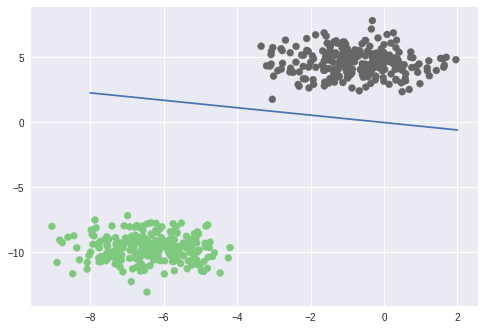

In [29]:
x1 = np.linspace(-8,2,10)
x2 = -(weights[0]*x1 + weights[2])/weights[1]
plt.scatter(X[:,0], X[:,1], c=Y, cmap=plt.cm.Accent)
plt.plot(x1,x2)
plt.show()

### Accuracy

In [30]:
Y_ = getPrediction(X, weights, getLabels=True)
train_acc = np.sum(Y_==Y)/Y.shape[0]
print(train_acc)

1.0


## Non Linear Data

In [48]:
from sklearn.datasets import make_moons

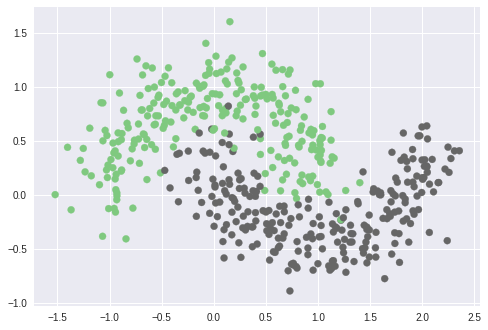

In [49]:
X_moons,Y_moons = make_moons(n_samples=500, shuffle=True, noise=0.2, random_state=1)

plt.style.use("seaborn")
plt.scatter(X_moons[:,0], X_moons[:,1], c=Y_moons, cmap=plt.cm.Accent)
plt.show()

In [50]:
weights_moons = train(X_moons,Y_moons, max_epochs=1000, learning_rate=0.8)

Epochs 0 Loss 0.620458
Epochs 10 Loss 0.400253
Epochs 20 Loss 0.351275
Epochs 30 Loss 0.328471
Epochs 40 Loss 0.314706
Epochs 50 Loss 0.305363
Epochs 60 Loss 0.298618
Epochs 70 Loss 0.293566
Epochs 80 Loss 0.289685
Epochs 90 Loss 0.286650
Epochs 100 Loss 0.284241
Epochs 110 Loss 0.282304
Epochs 120 Loss 0.280732
Epochs 130 Loss 0.279445
Epochs 140 Loss 0.278381
Epochs 150 Loss 0.277497
Epochs 160 Loss 0.276758
Epochs 170 Loss 0.276136
Epochs 180 Loss 0.275610
Epochs 190 Loss 0.275164
Epochs 200 Loss 0.274783
Epochs 210 Loss 0.274458
Epochs 220 Loss 0.274179
Epochs 230 Loss 0.273939
Epochs 240 Loss 0.273732
Epochs 250 Loss 0.273553
Epochs 260 Loss 0.273398
Epochs 270 Loss 0.273263
Epochs 280 Loss 0.273146
Epochs 290 Loss 0.273044
Epochs 300 Loss 0.272955
Epochs 310 Loss 0.272877
Epochs 320 Loss 0.272808
Epochs 330 Loss 0.272748
Epochs 340 Loss 0.272696
Epochs 350 Loss 0.272650
Epochs 360 Loss 0.272609
Epochs 370 Loss 0.272574
Epochs 380 Loss 0.272542
Epochs 390 Loss 0.272514
Epochs 400 

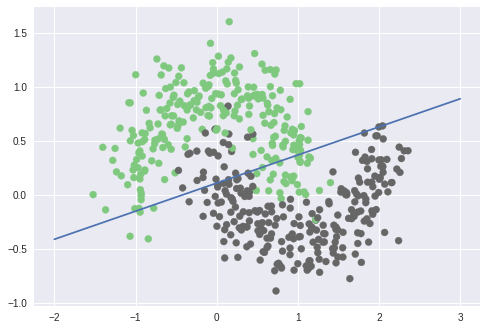

In [51]:
x1_moons = np.linspace(-2,3,10)
x2_moons = -(weights_moons[0]*x1_moons + weights_moons[2])/weights_moons[1]
plt.scatter(X_moons[:,0], X_moons[:,1], c=Y_moons, cmap=plt.cm.Accent)
plt.plot(x1_moons,x2_moons)
plt.show()

In [53]:
Y_pred_moons = getPrediction(X_moons, weights_moons, getLabels=True)
train_acc_moons = np.sum(Y_pred_moons==Y_moons)/Y_moons.shape[0]
print(train_acc_moons)

0.886


## Bad accuracy of Non Linear Data